In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

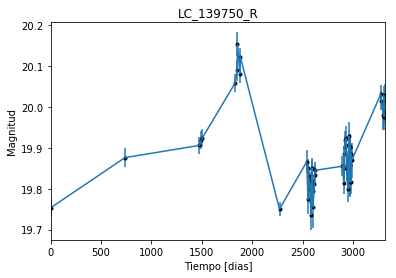

In [2]:
data = np.genfromtxt('LC_139750_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_139750_R')
plt.savefig("LC_139750_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

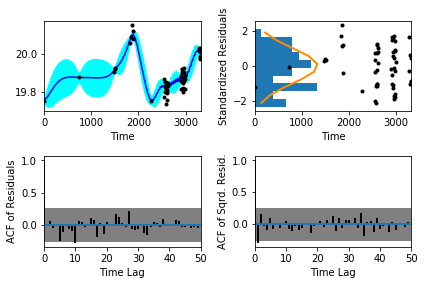

In [5]:
sample.assess_fit()

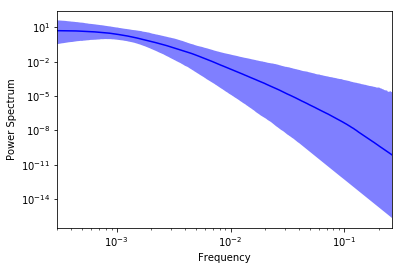

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

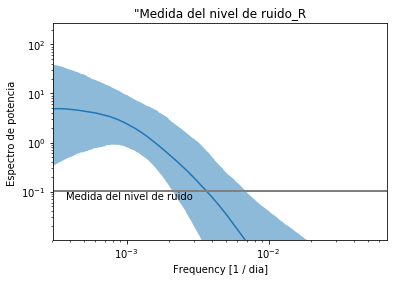

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_139750_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_139750_R')

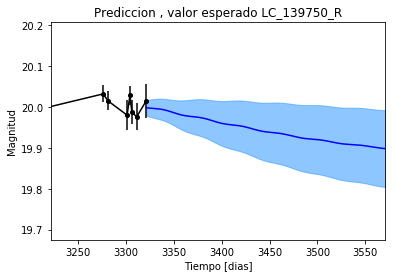

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_139750_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_139750_R')

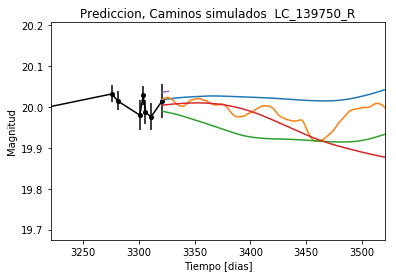

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_139750_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


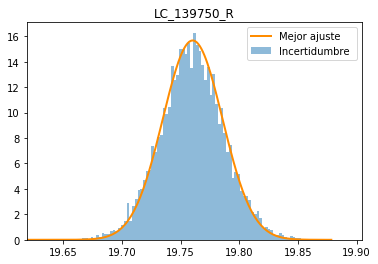

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_139750_R')
plt.savefig("Mejor_ajuste_LC_139750_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_139750_R')

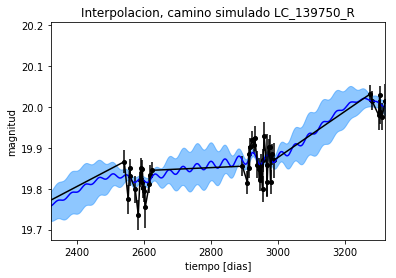

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_139750_R')

Text(0.5,1,'Interpolacion, camino simulado LC_139750_R')

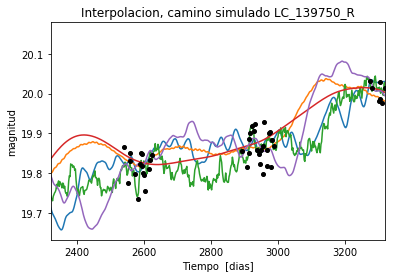

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_139750_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 2644.37230707
Median: 0.00513759449574
Standard deviation: 0.103768121578
68% credibility interval: [ 0.00059434  0.09732987]
95% credibility interval: [  3.34258394e-04   4.25941962e-01]
99% credibility interval: [  3.07664472e-04   4.94594731e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 2028.25017449
Median: 0.00119165953602
Standard deviation: 0.0554293429183
68% credibility interval: [ 0.00044038  0.01616222]
95% credibility interval: [ 0.00031978  0.17707656]
99% credibility interval: [  3.05601445e-04   4.35051435e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 271.246345306
Median: 0.0140858431639
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1298.74637613
Median: 117.03844569
Standard deviation: 1.66191521809
68% credibility interval: [ 115.14515694  118.1278301 ]
95% credibility interval: [ 112.51765285  119.03256384]
99% credibility interval: [ 110.46312396  119.51581521]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 932.670007315
Median: 0.41596623869
Standard deviation: 1.19546316257
68% credibility interval: [ 0.04443166  2.27584113]
95% credibility interval: [ 0.01437246  4.02966102]
99% credibility interval: [ 0.00993287  5.64523899]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 419.717095359
Median: 0.0825136888195
Standard deviation: 2.58735704503
68% credibility interval: [ 0.00380661  2.1750286 ]
95% credibility interval: [  3.45096658e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1163.14977434
Median: 1.87378394515e-23
Standard deviation: 4.69978782789e+149
68% credibility interval: [  2.58176689e-81   1.21276303e+51]
95% credibility interval: [  4.87162569e-179   1.96695367e+134]
99% credibility interval: [  2.98684116e-188   1.79289540e+149]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3119.84776896
Median: 19.8898370605
Standard deviation: 0.0576141696382
68% credibility interval: [ 19.84593187  19.93161383]
95% credibility interval: [ 19.76484035  19.99994436]
99% credibility interval: [ 19.67089068  20.08129565]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1375.96708943
Median: 0.00133483700594
Standard deviation: 0.125431339253
68% credibility interval: [ 0.          0.16667539]
95% credibility interval: [ 0.          0.45616641]
99% credibility interval: [ 0.          0.50913834]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1375.96708943
Median: 0.00133483700594
Standard deviation: 0.125431339253
68% credibility interval: [ 0.          0.16667539]
95% credibility interval: [ 0.          0.45616641]
99% credibility interval: [ 0.          0.50913834]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 488.620529524
Median: 0.0
Standard deviation: 0.000511014401538
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1298.74637613
Median: 117.03844569
Standard deviation: 1.66191521809
68% credibility interval: [ 115.14515694  118.1278301 ]
95% credibility interval: [ 112.51765285  119.03256384]
99% credibility interval: [ 110.46312396  119.51581521]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1541.05107955
Median: 0.0137417088367
Standard deviation: 0.017775660213
68% credibility interval: [ 0.00801658  0.02605633]
95% credibility interval: [ 0.00525217  0.06078784]
99% credibility interval: [ 0.00412001  0.11586941]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1279.83944061
Median: 1.21488028496
Standard deviation: 0.192099452017
68% credibility interval: [ 1.03843287  1.41177048]
95% credibility interval: [ 0.89153287  1.65908806]
99% credibility interval: [ 0.81227674  1.80944133]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1103.32097246
Median: 6.29309828851e-06
Standard deviation: 0.0138416715124
68% credibility interval: [  5.97380733e-56   6.92694868e-04]
95% credibility interval: [  1.34608047e-139   1.49829183e-002]
99% credibility interval: [  6.19811778e-153   8.05704959e-002]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 2644.37230707
Median: (-0.0322804582499-0.0719416705506j)
Standard deviation: 1.02284475031
68% credibility interval: [-0.61154163+0.j         -0.00373435-0.16060171j]
95% credibility interval: [ -2.67627227e+00-3.1646645j   -2.10020743e-03-0.01998168j]
99% credibility interval: [ -3.10763035e+00+0.j          -1.93311289e-03-0.00297353j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 2028.25017449
Median: (-0.0074874176879+0.0083611673747j)
Standard deviation: 0.861631437547
68% credibility interval: [-0.10155024+1.13027417j -0.00276700+0.16755697j]
95% credibility interval: [-1.11260482+0.62153302j -0.00200924+0.00436643j]
99% credibility interval: [ -2.73350878e+00+2.83165918j  -1.92015051e-03+1.01315273j]
Posterior